##TODO:


group continuous features (e.g. price range)

In [5]:
from car_analysis_group_exercise.base_data_handler import BaseDataHandler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [6]:
file_path = "car_analysis_group_exercise/Cars Datasets 2025.csv"
handler = BaseDataHandler(file_path, encoding='latin-1')

## Preview of the DataFrame

Below is the first 20 rows (`head(20)`) of the dataset, shown just to give a sense of its structure and contents.

In [7]:
handler.print_dataframe(20)

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm
...,...,...,...,...,...,...,...,...,...,...,...
1213,Toyota,Crown Signia,2.5L Hybrid I4,2487 cc,240 hp,180 km/h,7.6 sec,"$43,590  $48,000",Hybrid (Gas + Electric),5,239 Nm
1214,Toyota,4Runner (6th Gen),2.4L Turbo I4 (i-FORCE MAX Hybrid),2393 cc + Battery,326 hp,180 km/h,6.8 sec,"$50,000",Hybrid,7,630 Nm
1215,Toyota,Corolla Cross,2.0L Gas / 2.0L Hybrid,1987 cc / Hybrid batt,169  196 hp,190 km/h,8.0  9.2 sec,"$25,210  $29,135",Gas / Hybrid,5,190  210 Nm
1216,Toyota,C-HR+,1.8L / 2.0L Hybrid,1798 / 1987 cc + batt,140  198 hp,180 km/h,7.9  10.5 sec," 33,000",Hybrid,5,190  205 Nm


## Descriptive Statistics

The table below shows the summary statistics for the dataset, 
including measures such as count, mean, standard deviation, minimum, and quartiles.

In [8]:
handler.df.describe()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
count,1218,1218,1218,1215,1218,1218,1212,1218,1218,1218,1217
unique,37,1201,356,311,456,114,180,535,23,19,263
top,Nissan,Polo BlueMotion,I4,1984 cc,355 hp,250 km/h,6.5 sec,"$35,000",Petrol,5,400 Nm
freq,149,2,64,31,23,145,45,36,871,692,72


# Data Cleaning
#### Null Handling and normalization

1. **`Before`**  
   → Inspect DataFrame structure (rows, columns, types, null counts).

2. **`Null Handling`**  
   → Remove rows with missing values, directly modifying the DataFrame.

3. **`After`**  
   → Re-check structure after cleaning to confirm changes.

4. **`Column Naming Normalization`**  
   → Standardize column names (e.g., lowercase, no spaces/symbols).

`Before`

In [9]:
handler.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1218 non-null   object
 1   Cars Names                 1218 non-null   object
 2   Engines                    1218 non-null   object
 3   CC/Battery Capacity        1215 non-null   object
 4   HorsePower                 1218 non-null   object
 5   Total Speed                1218 non-null   object
 6   Performance(0 - 100 )KM/H  1212 non-null   object
 7   Cars Prices                1218 non-null   object
 8   Fuel Types                 1218 non-null   object
 9   Seats                      1218 non-null   object
 10  Torque                     1217 non-null   object
dtypes: object(11)
memory usage: 104.8+ KB


`After`

In [10]:
handler.df.dropna(inplace=True)
handler.df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1210 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1210 non-null   object
 1   Cars Names                 1210 non-null   object
 2   Engines                    1210 non-null   object
 3   CC/Battery Capacity        1210 non-null   object
 4   HorsePower                 1210 non-null   object
 5   Total Speed                1210 non-null   object
 6   Performance(0 - 100 )KM/H  1210 non-null   object
 7   Cars Prices                1210 non-null   object
 8   Fuel Types                 1210 non-null   object
 9   Seats                      1210 non-null   object
 10  Torque                     1210 non-null   object
dtypes: object(11)
memory usage: 113.4+ KB


`Columns Normalization`

In [11]:
s, clean_df = handler.try_clean_column_names()
clean_df.head(5)

,company_names,cars_names,engines,cc_battery_capacity,horsepower,total_speed,performance_0_100_km_h,cars_prices,fuel_types,seats,torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


### Fuel Type Cleaning

**Workflow overview:**

1. **Copying the DataFrame**  
   Work on a duplicate to preserve the original dataset.

2. **String normalization**  
   Ensure all values are strings, trim whitespace, collapse multiple spaces, and apply consistent capitalization.

3. **Character replacement**  
   Replace problematic symbols (`/`, `(`, `)`) with commas, normalize spacing and hyphens, remove redundant phrases, and fix typos.

4. **Splitting & rejoining values**  
   Break multi-value entries into parts, clean each, sort alphabetically, and rejoin with commas for consistency.

5. **Filtering unwanted patterns**  
   Exclude rows containing specific undesired categories (e.g., Gas, Electric Hybrid, AWD, CNG).

`Before`

In [12]:
#visualization
group_df = clean_df.groupby("fuel_types").count()
group_df.head(200)

,company_names,cars_names,engines,cc_battery_capacity,horsepower,total_speed,performance_0_100_km_h,cars_prices,seats,torque
fuel_types,,,,,,,,,,
CNG/Petrol,1,1,1,1,1,1,1,1,1,1
Diesel,102,102,102,102,102,102,102,102,102,102
Diesel/Petrol,4,4,4,4,4,4,4,4,4,4
Electric,95,95,95,95,95,95,95,95,95,95
Gas / Hybrid,1,1,1,1,1,1,1,1,1,1
Hybrid,79,79,79,79,79,79,79,79,79,79
Hybrid (Gas + Electric),1,1,1,1,1,1,1,1,1,1
Hybrid (Petrol),4,4,4,4,4,4,4,4,4,4
Hybrid / Plug-in,1,1,1,1,1,1,1,1,1,1


`After`

In [13]:
col = "fuel_types"

clean_df = handler.df.copy()
clean_df[col] = (
    handler.df[col]
    .astype(str)              # ensure strings
    .str.strip()              # remove leading/trailing whitespace
    .str.replace(r"\s+", " ", regex=True)  # normalize multiple spaces
    .str.title()              # consistent capitalization
)


clean_df[col] = clean_df[col] = (
    clean_df[col]
    .astype(str)
    .str.replace(r"[\/\(\)]", ",", regex=True)  # replace / ( ) with commas
)

clean_df[col] = clean_df[col].str.replace(r"[\s-]+", " ", regex=True).str.strip()
clean_df[col] = clean_df[col].str.replace("Plug In", "", regex=True).str.strip()
clean_df[col] = clean_df[col].str.replace("Hyrbrid", "Hybrid", regex=True).str.strip()

clean_df[col] = (
    clean_df[col]
    .str.split(",")
    .apply(lambda parts: ", ".join(sorted([p.strip().title() for p in parts if p.strip()])))
)

new_mask = clean_df[col].str.contains("Gas|Electric, Hybrid|Awd|Cng", case=False, na=False)

# Keep only rows that do NOT match any of those patterns
clean_df = clean_df[~new_mask]



#visualization
group_df = clean_df.groupby(col).count()
group_df.head(200)

,company_names,cars_names,engines,cc_battery_capacity,horsepower,total_speed,performance_0_100_km_h,cars_prices,seats,torque
fuel_types,,,,,,,,,,
Diesel,102,102,102,102,102,102,102,102,102,102
"Diesel, Petrol",23,23,23,23,23,23,23,23,23,23
Electric,95,95,95,95,95,95,95,95,95,95
"Ev, Petrol",1,1,1,1,1,1,1,1,1,1
Hybrid,86,86,86,86,86,86,86,86,86,86
"Hybrid, Petrol",23,23,23,23,23,23,23,23,23,23
Hydrogen,3,3,3,3,3,3,3,3,3,3
Petrol,871,871,871,871,871,871,871,871,871,871


### Company Name Cleaning

**Process overview:**

1. **Copying the DataFrame**  
   - Work on a duplicate to avoid altering the original dataset.

2. **String normalization**  
   - Convert values to strings.  
   - Trim whitespace, collapse multiple spaces, and apply consistent capitalization.

`Before`

In [14]:
col = "company_names"

group_df = clean_df.groupby(col).count()
group_df.head(200)

,cars_names,engines,cc_battery_capacity,horsepower,total_speed,performance_0_100_km_h,cars_prices,fuel_types,seats,torque
company_names,,,,,,,,,,
ASTON MARTIN,11,11,11,11,11,11,11,11,11,11
AUDI,21,21,21,21,21,21,21,21,21,21
Acura,27,27,27,27,27,27,27,27,27,27
BENTLEY,1,1,1,1,1,1,1,1,1,1
BMW,41,41,41,41,41,41,41,41,41,41
Bugatti,10,10,10,10,10,10,10,10,10,10
Cadillac,20,20,20,20,20,20,20,20,20,20
Chevrolet,58,58,58,58,58,58,58,58,58,58
FERRARI,9,9,9,9,9,9,9,9,9,9


`After`

In [15]:

clean_df = clean_df.copy()
clean_df[col] = (
    clean_df[col]
    .astype(str)              # ensure strings
    .str.strip()              # remove leading/trailing whitespace
    .str.replace(r"\s+", " ", regex=True)  # normalize multiple spaces
    .str.title()              # consistent capitalization
)

group_df = clean_df.groupby(col).count()
group_df.head(200)


,cars_names,engines,cc_battery_capacity,horsepower,total_speed,performance_0_100_km_h,cars_prices,fuel_types,seats,torque
company_names,,,,,,,,,,
Acura,27,27,27,27,27,27,27,27,27,27
Aston Martin,11,11,11,11,11,11,11,11,11,11
Audi,21,21,21,21,21,21,21,21,21,21
Bentley,1,1,1,1,1,1,1,1,1,1
Bmw,41,41,41,41,41,41,41,41,41,41
Bugatti,10,10,10,10,10,10,10,10,10,10
Cadillac,20,20,20,20,20,20,20,20,20,20
Chevrolet,58,58,58,58,58,58,58,58,58,58
Ferrari,9,9,9,9,9,9,9,9,9,9


### Car Price Cleaning
**Process overview:**

1. **Initialize DataFrame**  
   - Re-initialize the cleaned DataFrame to ensure consistency before transformations.

2. **String-to-number conversion**  
   - Apply a cleaning routine to the `car_prices` column.  
   - Standardizes messy string formats (e.g., currency symbols, separators) into proper numeric values.

`Before`

In [16]:
col = "cars_prices"

group_df = clean_df.groupby(col).count()
group_df.head(1500)

,company_names,cars_names,engines,cc_battery_capacity,horsepower,total_speed,performance_0_100_km_h,fuel_types,seats,torque
cars_prices,,,,,,,,,,
"$1,000,000",1,1,1,1,1,1,1,1,1,1
"$1,100,000",4,4,4,4,4,4,4,4,4,4
"$1,300,000",1,1,1,1,1,1,1,1,1,1
"$1,700,000",1,1,1,1,1,1,1,1,1,1
"$10,000",2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...
"$98,000",1,1,1,1,1,1,1,1,1,1
"$98,300",2,2,2,2,2,2,2,2,2,2
"$98,490",1,1,1,1,1,1,1,1,1,1


`After`

In [17]:
handler.try_init_df(clean_df)
handler.try_clean_string_to_number_col(col)

clean_df = handler.df.copy()
group_df = clean_df.groupby(col).count()
group_df.sort_values(ascending=True, by=col).head(1500)


,company_names,cars_names,engines,cc_battery_capacity,horsepower,total_speed,performance_0_100_km_h,fuel_types,seats,torque
cars_prices,,,,,,,,,,
4000.0,1,1,1,1,1,1,1,1,1,1
5000.0,1,1,1,1,1,1,1,1,1,1
6200.0,1,1,1,1,1,1,1,1,1,1
6500.0,1,1,1,1,1,1,1,1,1,1
7000.0,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
5000000.0,1,1,1,1,1,1,1,1,1,1
5800000.0,1,1,1,1,1,1,1,1,1,1
6000000.0,1,1,1,1,1,1,1,1,1,1


### Seat Count Cleaning

**Process overview:**

1. **String-to-number conversion**  
   - Apply a cleaning routine to the `seats` column.  
   - Converts messy string values (e.g., `"5 seats"`, `"7-seater"`) into standardized numeric values.

`Before`

In [18]:
col = "seats"
group_df = clean_df.groupby(col).count()
group_df.sort_values(ascending=True, by=col).head(20)

,company_names,cars_names,engines,cc_battery_capacity,horsepower,total_speed,performance_0_100_km_h,cars_prices,fuel_types,torque
seats,,,,,,,,,,
1,3,3,3,3,3,3,3,3,3,3
12,1,1,1,1,1,1,1,1,1,1
2,131,131,131,131,131,131,131,131,131,131
2+2,5,5,5,5,5,5,5,5,5,5
212,1,1,1,1,1,1,1,1,1,1
215,1,1,1,1,1,1,1,1,1,1
26,2,2,2,2,2,2,2,2,2,2
27,1,1,1,1,1,1,1,1,1,1
29,1,1,1,1,1,1,1,1,1,1


`After`

In [19]:

handler.try_clean_string_to_number_col(col)
clean_df = handler.df.copy()
group_df = clean_df.groupby(col).count()
group_df.sort_values(ascending=True, by=col).head(20)

,company_names,cars_names,engines,cc_battery_capacity,horsepower,total_speed,performance_0_100_km_h,cars_prices,fuel_types,torque
seats,,,,,,,,,,
1.0,3,3,3,3,3,3,3,3,3,3
2.0,136,136,136,136,136,136,136,136,136,136
3.0,14,14,14,14,14,14,14,14,14,14
4.0,163,163,163,163,163,163,163,163,163,163
4.5,1,1,1,1,1,1,1,1,1,1
5.0,685,685,685,685,685,685,685,685,685,685
5.5,1,1,1,1,1,1,1,1,1,1
6.0,20,20,20,20,20,20,20,20,20,20
7.0,148,148,148,148,148,148,148,148,148,148


### Total Speed Cleaning

**Process overview:**

1. **String-to-number conversion**  
   - Apply a cleaning routine to the `total_speed` column.  
   - Converts inconsistent string formats (e.g., `"200 km/h"`, `"180-kph"`) into standardized numeric values.

`Before`

In [20]:
col = "total_speed"

group_df = clean_df.groupby(col).count()
group_df.head(200)

,company_names,cars_names,engines,cc_battery_capacity,horsepower,performance_0_100_km_h,cars_prices,fuel_types,seats,torque
total_speed,,,,,,,,,,
100 km/h,1,1,1,1,1,1,1,1,1,1
105 km/h,1,1,1,1,1,1,1,1,1,1
110 km/h,4,4,4,4,4,4,4,4,4,4
120 km/h,11,11,11,11,11,11,11,11,11,11
125 km/h,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
490 km/h,1,1,1,1,1,1,1,1,1,1
500 km/h,1,1,1,1,1,1,1,1,1,1
80 km/h,1,1,1,1,1,1,1,1,1,1


`After`

In [21]:
col = "total_speed"

handler.try_clean_string_to_number_col(col)
clean_df = handler.df.copy()
group_df = clean_df.groupby(col).count()
group_df.head(200)

,company_names,cars_names,engines,cc_battery_capacity,horsepower,performance_0_100_km_h,cars_prices,fuel_types,seats,torque
total_speed,,,,,,,,,,
80.0,1,1,1,1,1,1,1,1,1,1
85.0,1,1,1,1,1,1,1,1,1,1
90.0,1,1,1,1,1,1,1,1,1,1
100.0,1,1,1,1,1,1,1,1,1,1
105.0,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
380.0,2,2,2,2,2,2,2,2,2,2
402.0,2,2,2,2,2,2,2,2,2,2
420.0,5,5,5,5,5,5,5,5,5,5


In [22]:
handler.df = clean_df.copy()

### Splitting Mixed Column: Engine CC vs Battery Capacity

**Process overview:**
1. **Split CC/Battery Capacity**
   - Detect the `"/"` and splits the string in 2.

2. **Identify engine cc values**  
   - Detect strings with `"cc"`.  
   - Assign them to a new column called `engine_cc`.

3. **Identify battery capacity values**  
   - Take strings with `"Kwh"`.  
   - Assign them to a new column called `battery_capacity`.

4. **Remove the original mixed column**  
   - Drop `cc_battery_capacity` once its values have been split into the two new columns.

`Before`

In [23]:
handler.print_dataframe(20)

,company_names,cars_names,engines,cc_battery_capacity,horsepower,total_speed,performance_0_100_km_h,cars_prices,fuel_types,seats,torque
0,Ferrari,SF90 STRADALE,V8,3990 cc,963 hp,340.0,2.5 sec,1100000.0,Hybrid,2.0,800 Nm
1,Rolls Royce,PHANTOM,V12,6749 cc,563 hp,250.0,5.3 sec,460000.0,Petrol,5.0,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165.0,10.5 sec,13500.0,Petrol,5.0,100 - 140 Nm
3,Mercedes,GT 63 S,V8,"3,982 cc",630 hp,250.0,3.2 sec,161000.0,Petrol,4.0,900 Nm
4,Audi,AUDI R8 Gt,V10,"5,204 cc",602 hp,320.0,3.6 sec,253290.0,Petrol,2.0,560 Nm
...,...,...,...,...,...,...,...,...,...,...,...
1211,Mazda,Millenia S,2.5L V6,"2,500 cc",200 hp,220.0,8.0 sec,32500.0,Petrol,5.0,250 Nm
1212,Mazda,787B (Race Car),2.6L Wankel Rotary Engine,"2,620 cc",700 hp,320.0,3.5 sec,6000000.0,Petrol,1.0,500 Nm
1214,Toyota,4Runner (6th Gen),2.4L Turbo I4 (i-FORCE MAX Hybrid),2393 cc + Battery,326 hp,180.0,6.8 sec,50000.0,Hybrid,7.0,630 Nm
1216,Toyota,C-HR+,1.8L / 2.0L Hybrid,1798 / 1987 cc + batt,140  198 hp,180.0,7.9  10.5 sec,33000.0,Hybrid,5.0,190  205 Nm


`After` (engine_cc)

In [24]:
"""
Split a mixed column containing cc and battery capacity values
into two separate numeric columns: 'engine_cc' and 'battery_capacity'.
Assumes cc values end with 'cc'.
"""

def normalize_number_string(s: str) -> str:
    # Remove thousand separators (commas, dots, spaces)
    return s.replace(",", "").replace(" ", "")

def extract_engine_cc(s):
    s = normalize_number_string(str(s))
    matches = re.findall(r"(\d+(?:\.\d+)?)\s*cc", s, flags=re.IGNORECASE)
    if not matches:
        return None
    vals = [int(float(match)) for match in matches]
    return int(np.mean(vals))

def extract_battery_capacity(s):
    s = normalize_number_string(str(s))
    matches = re.findall(r"(\d+(?:\.\d+)?)\s*kwh", s, flags=re.IGNORECASE)
    if not matches:
        return None
    vals = [float(match) for match in matches]
    return float(np.mean(vals))

col = "cc_battery_capacity"
handler.df["engine_cc"] = handler.df[col].apply(extract_engine_cc)
handler.df["battery_capacity"] = handler.df[col].apply(extract_battery_capacity)
handler.df = handler.df.drop(columns=[col])

group_df = handler.df.groupby("engine_cc").count()
group_df.head(20)


,company_names,cars_names,engines,horsepower,total_speed,performance_0_100_km_h,cars_prices,fuel_types,seats,torque,battery_capacity
engine_cc,,,,,,,,,,,
360.0,1,1,1,1,1,1,1,1,1,1,0
624.0,1,1,1,1,1,1,1,1,1,1,0
657.0,2,2,2,2,2,2,2,2,2,2,0
659.0,1,1,1,1,1,1,1,1,1,1,0
660.0,8,8,8,8,8,8,8,8,8,8,0
800.0,1,1,1,1,1,1,1,1,1,1,0
987.0,1,1,1,1,1,1,1,1,1,1,0
998.0,1,1,1,1,1,1,1,1,1,1,0
999.0,7,7,7,7,7,7,7,7,7,7,0


`After` (battery_capacity)

In [25]:
col = "battery_capacity"
group_df = handler.df.groupby(col).count()
group_df.head(2000)

,company_names,cars_names,engines,horsepower,total_speed,performance_0_100_km_h,cars_prices,fuel_types,seats,torque,engine_cc
battery_capacity,,,,,,,,,,,
1.24,1,1,1,1,1,1,1,1,1,1,0
1.49,1,1,1,1,1,1,1,1,1,1,1
1.56,1,1,1,1,1,1,1,1,1,1,0
11.40,2,2,2,2,2,2,2,2,2,2,0
11.60,1,1,1,1,1,1,1,1,1,1,0
13.80,2,2,2,2,2,2,2,2,2,2,2
16.00,1,1,1,1,1,1,1,1,1,1,0
17.30,2,2,2,2,2,2,2,2,2,2,0
17.90,4,4,4,4,4,4,4,4,4,4,0


In [26]:
handler.df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1204 entries, 0 to 1217
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   company_names           1204 non-null   object 
 1   cars_names              1204 non-null   object 
 2   engines                 1204 non-null   object 
 3   horsepower              1204 non-null   object 
 4   total_speed             1204 non-null   float64
 5   performance_0_100_km_h  1204 non-null   object 
 6   cars_prices             1204 non-null   float64
 7   fuel_types              1204 non-null   object 
 8   seats                   1204 non-null   float64
 9   torque                  1204 non-null   object 
 10  engine_cc               1097 non-null   float64
 11  battery_capacity        110 non-null    float64
dtypes: float64(5), object(7)
memory usage: 122.3+ KB


### Horsepower Cleaning

**Process overview:**

1. **String-to-number conversion**  
   - Apply a cleaning routine to the `horsepower` column.  
   - Converts messy string values (e.g., `"557 hp"`, `"378 hp - 748 hp"`) into standardized numeric values.

In [27]:
col = "horsepower"

handler.try_clean_string_to_number_col(col)
group_df = handler.df.groupby(col).count()
group_df.head(1500)

,company_names,cars_names,engines,total_speed,performance_0_100_km_h,cars_prices,fuel_types,seats,torque,engine_cc,battery_capacity
horsepower,,,,,,,,,,,
26.0,1,1,1,1,1,1,1,1,1,1,0
37.0,1,1,1,1,1,1,1,1,1,1,0
47.0,1,1,1,1,1,1,1,1,1,1,0
48.0,2,2,2,2,2,2,2,2,2,2,0
52.0,2,2,2,2,2,2,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...
1160.0,1,1,1,1,1,1,1,1,1,1,0
1288.0,1,1,1,1,1,1,1,1,1,0,1
1500.0,6,6,6,6,6,6,6,6,6,6,0


### Cleaning Torque

**Process overview:**

1. **String-to-number conversion**  
   - Apply a cleaning routine to the `torque` column.  

In [28]:
col = "torque"

handler.try_clean_string_to_number_col(col)
clean_df = handler.df.copy()
group_df = clean_df.groupby(col).count()
group_df.head(1500)

,company_names,cars_names,engines,horsepower,total_speed,performance_0_100_km_h,cars_prices,fuel_types,seats,engine_cc,battery_capacity
torque,,,,,,,,,,,
45.0,1,1,1,1,1,1,1,1,1,1,0
51.0,1,1,1,1,1,1,1,1,1,1,0
60.0,3,3,3,3,3,3,3,3,3,3,0
62.0,1,1,1,1,1,1,1,1,1,1,0
80.0,1,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2500.0,2,2,2,2,2,2,2,2,2,2,0
2600.0,1,1,1,1,1,1,1,1,1,1,0
3500.0,1,1,1,1,1,1,1,1,1,1,0


### Cleaning performace 0-100 km/h

**Process overview:**

1. **String-to-number conversion**  
   - Apply a cleaning routine to the `performance_0_100_km_h` column.

2. **Increase ease of use** 
   - Renaming for ease of use to just `performance` 

`Before`

In [29]:
col = "performance_0_100_km_h"

group_df = clean_df.groupby(col).count()
group_df.head(10)

,company_names,cars_names,engines,horsepower,total_speed,cars_prices,fuel_types,seats,torque,engine_cc,battery_capacity
performance_0_100_km_h,,,,,,,,,,,
6.1 sec,1,1,1,1,1,1,1,1,1,1,0
1.9 sec,1,1,1,1,1,1,1,1,1,0,1
10 sec,2,2,2,2,2,2,2,2,2,2,0
10. 5 sec,1,1,1,1,1,1,1,1,1,1,0
10.0 sec,19,19,19,19,19,19,19,19,19,19,0
10.1 sec,1,1,1,1,1,1,1,1,1,1,0
10.2 sec,14,14,14,14,14,14,14,14,14,9,5
10.3 sec,5,5,5,5,5,5,5,5,5,5,0
10.4 sec,3,3,3,3,3,3,3,3,3,2,1


`After`

In [30]:
col = "performance"
handler.try_rename_col(col="performance_0_100_km_h", name=col)

handler.try_clean_string_to_number_col(col)
clean_df = handler.df.copy()
group_df = clean_df.groupby(col).count()
group_df.head(10)

,company_names,cars_names,engines,horsepower,total_speed,cars_prices,fuel_types,seats,torque,engine_cc,battery_capacity
performance,,,,,,,,,,,
1.9,1,1,1,1,1,1,1,1,1,0,1
2.1,1,1,1,1,1,1,1,1,1,0,1
2.2,1,1,1,1,1,1,1,1,1,1,0
2.3,1,1,1,1,1,1,1,1,1,1,0
2.4,5,5,5,5,5,5,5,5,5,5,0
2.5,8,8,8,8,8,8,8,8,8,8,0
2.6,2,2,2,2,2,2,2,2,2,1,1
2.7,2,2,2,2,2,2,2,2,2,2,0
2.8,12,12,12,12,12,12,12,12,12,11,1


In [31]:
handler.df = clean_df.copy()

# Isolate Outliers
`IQR Filtering`

In [32]:
# 1. Calcolo dei Quartili
Q1 = handler.df['cars_prices'].quantile(0.25)
Q3 = handler.df['cars_prices'].quantile(0.75)
IQR = Q3 - Q1

# 2. Definizione dei limiti
lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR

print(f"Intervallo 'Normale' per prezzi: da {lower_bound:.2f} a {upper_bound:.2f}")
print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")

# 3. Individuazione degli Outlier
outliers_iqr = handler.df[(handler.df['cars_prices'] < lower_bound) | (handler.df['cars_prices'] > upper_bound)]
print(f"Numero di Outlier rilevati con IQR: {len(outliers_iqr)}")
print(f"Percentuale sul totale: {len(outliers_iqr)/len(handler.df)*100:.2f}%")

# Vediamo alcuni di questi outlier estremi
print("\nEsempi di outlier estremi:")
print(outliers_iqr['cars_prices'].sort_values(ascending=False).head(5))

Intervallo 'Normale' per prezzi: da -35000.00 a 133000.00
Q1: 28000.00, Q3: 70000.00, IQR: 42000.00
Numero di Outlier rilevati con IQR: 148
Percentuale sul totale: 12.29%

Esempi di outlier estremi:
887     18000000.0
886      9000000.0
1212     6000000.0
885      5800000.0
889      5000000.0
Name: cars_prices, dtype: float64


`Percentile filtering`

In [33]:
# 1. Choose percentile thresholds
lower_percentile = 0.01   # 1st percentile
upper_percentile = 0.90   # 90th percentile

# 2. Compute bounds
lower_bound = handler.df['cars_prices'].quantile(lower_percentile)
upper_bound = handler.df['cars_prices'].quantile(upper_percentile)

print(f"Intervallo 'Normale' per prezzi (percentile filtering): da {lower_bound:.2f} a {upper_bound:.2f}")

# 3. Filter outliers
outliers_percentile = handler.df[
    (handler.df['cars_prices'] < lower_bound) | (handler.df['cars_prices'] > upper_bound)
]

print(f"Numero di Outlier rilevati con percentile filtering: {len(outliers_percentile)}")
print(f"Percentuale sul totale: {len(outliers_percentile)/len(handler.df)*100:.2f}%")

# 4. Show some extreme examples
print("\nEsempi di outlier estremi (percentile filtering):")
print(outliers_percentile['cars_prices'].sort_values(ascending=False).head(20))

Intervallo 'Normale' per prezzi (percentile filtering): da 9206.00 a 175140.00
Numero di Outlier rilevati con percentile filtering: 134
Percentuale sul totale: 11.13%

Esempi di outlier estremi (percentile filtering):
887     18000000.0
886      9000000.0
1212     6000000.0
885      5800000.0
889      5000000.0
8        4500000.0
888      4500000.0
882      3500000.0
881      3300000.0
883      3300000.0
884      3300000.0
32       3200000.0
880      3000000.0
42       2800000.0
13       1700000.0
41       1300000.0
416      1100000.0
40       1100000.0
33       1100000.0
0        1100000.0
Name: cars_prices, dtype: float64


## Cleaned DataFrame display
`head(50)`

In [34]:
handler.df.head(50)

,company_names,cars_names,engines,horsepower,total_speed,performance,cars_prices,fuel_types,seats,torque,engine_cc,battery_capacity
0,Ferrari,SF90 STRADALE,V8,963.0,340.0,2.5,1100000.0,Hybrid,2.0,800.0,3990.0,NaN
1,Rolls Royce,PHANTOM,V12,563.0,250.0,5.3,460000.0,Petrol,5.0,900.0,6749.0,NaN
2,Ford,KA+,1.2L Petrol,77.5,165.0,10.5,13500.0,Petrol,5.0,120.0,1200.0,NaN
3,Mercedes,GT 63 S,V8,630.0,250.0,3.2,161000.0,Petrol,4.0,900.0,3982.0,NaN
4,Audi,AUDI R8 Gt,V10,602.0,320.0,3.6,253290.0,Petrol,2.0,560.0,5204.0,NaN
5,Bmw,Mclaren 720s,V8,710.0,341.0,2.9,499000.0,Petrol,2.0,770.0,3994.0,NaN
6,Aston Martin,VANTAGE F1,V8,656.0,314.0,3.6,193440.0,Petrol,2.0,685.0,3982.0,NaN
7,Bentley,Continental GT Azure,V8,550.0,318.0,4.0,311000.0,Petrol,4.0,900.0,3996.0,NaN
8,Lamborghini,VENENO ROADSTER,V12,750.0,356.0,2.9,4500000.0,Petrol,2.0,690.0,6498.0,NaN
9,Ferrari,F8 TRIBUTO,V8,710.0,340.0,2.9,280000.0,Petrol,2.0,770.0,3900.0,NaN


## Outlier Graphs

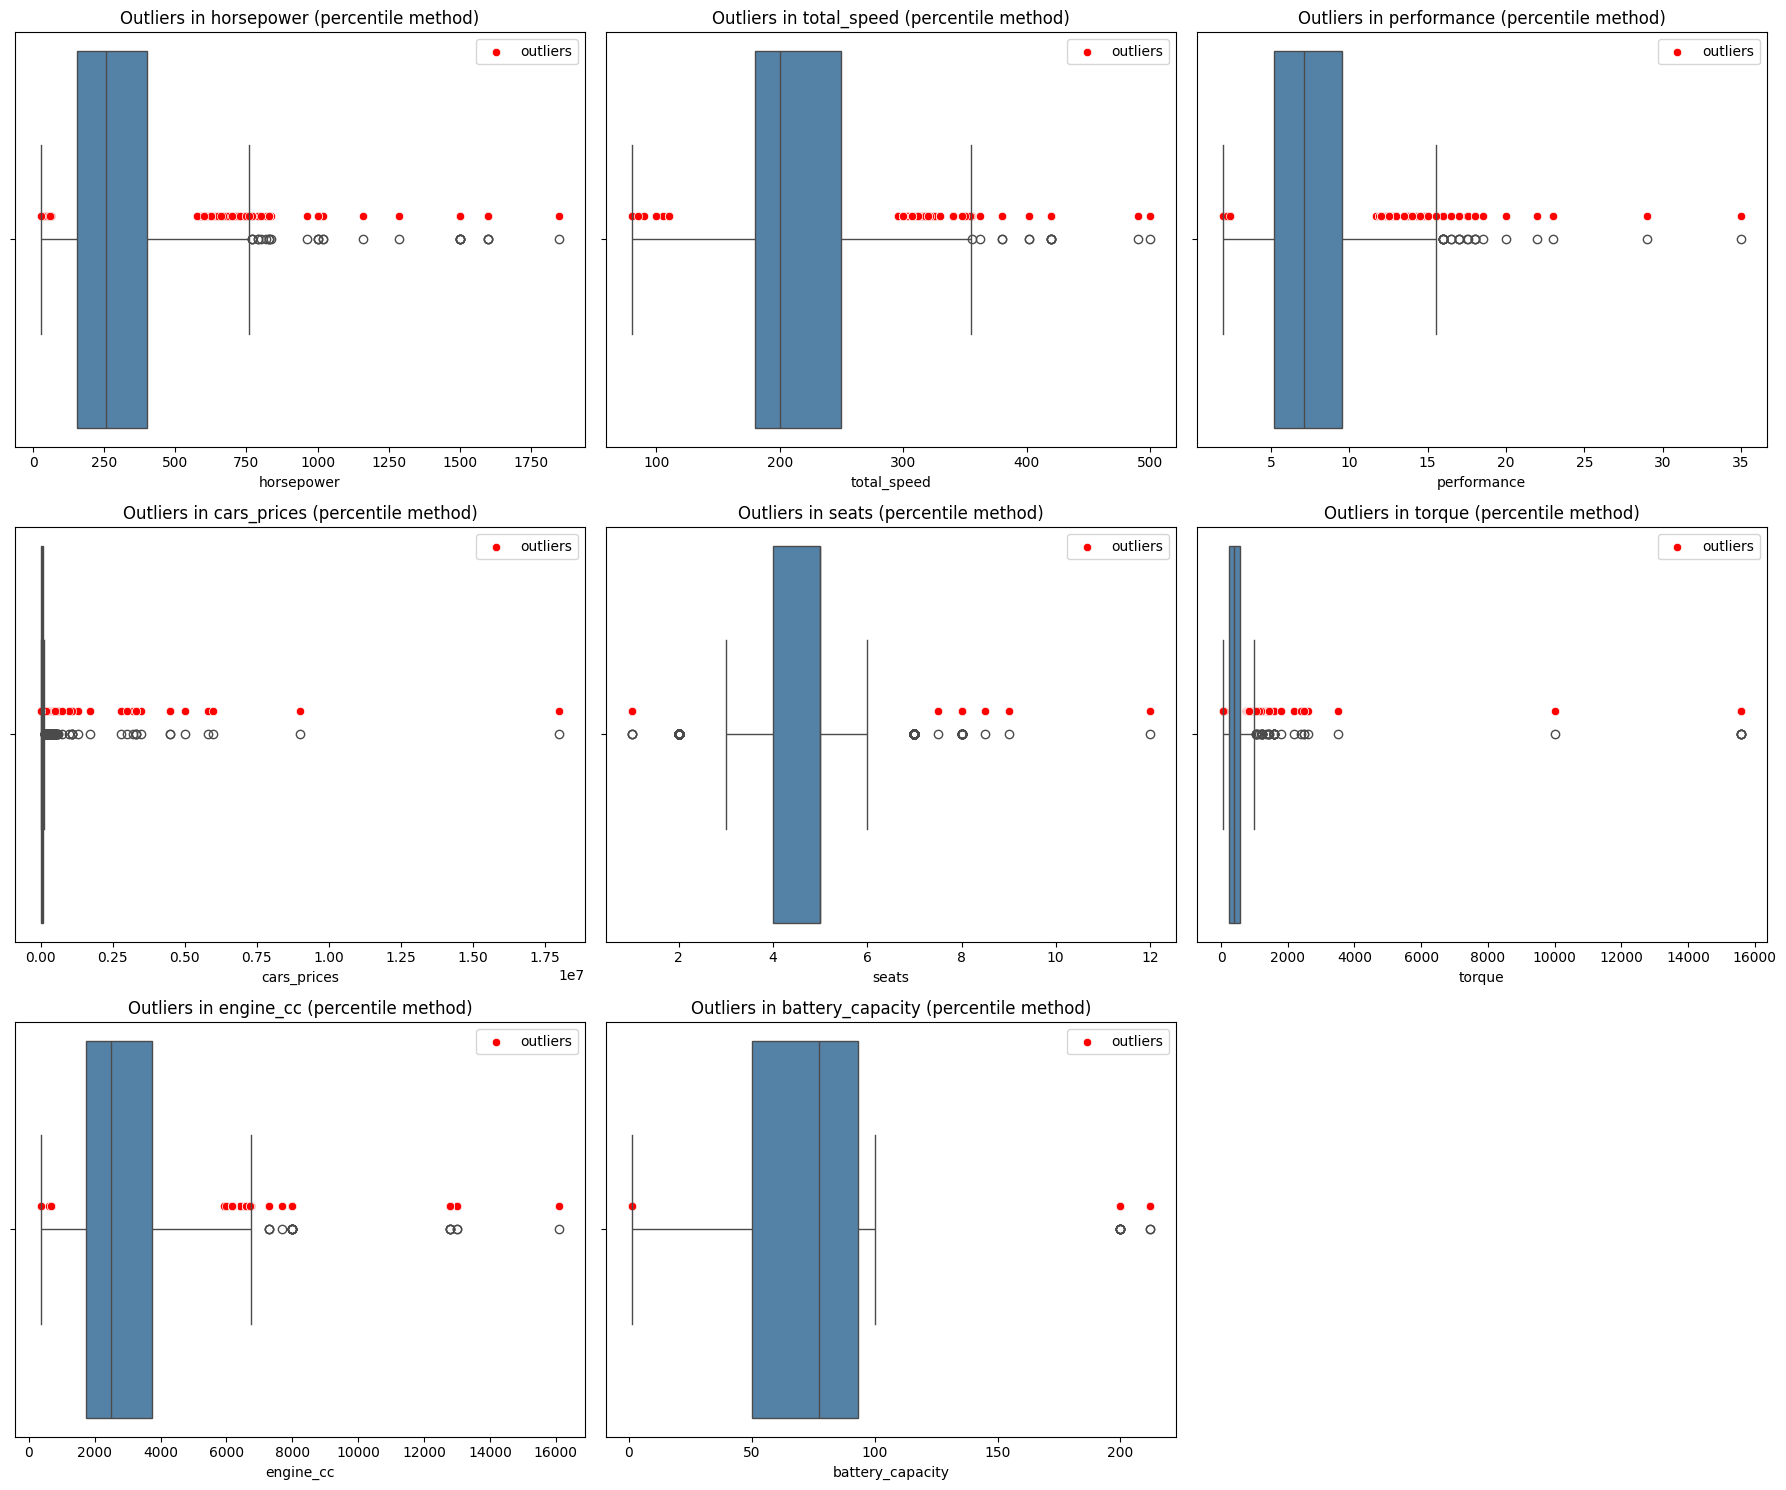

In [35]:
# Detect outliers with percentile method
outlier_flags = handler.detect_outliers_all(
    method="percentile", lower_percentile=0.01, upper_percentile=0.90
)

# Get numeric columns
numeric_cols = handler.df.select_dtypes(include="number").columns
n_cols = len(numeric_cols)

# Grid layout: 3 plots per row
n_rows = (n_cols + 2) // 3
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5*n_rows))  # larger grid
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    # Full boxplot
    sns.boxplot(data=handler.df, x=col, color="steelblue", ax=axes[i])

    # Overlay outliers in red
    new_mask = outlier_flags[col]
    sns.scatterplot(
        x=handler.df[col][new_mask],
        y=[-0.05]*new_mask.sum(),   # jitter so they appear just below the box
        color="red",
        marker="o",
        ax=axes[i],
        label="outliers"
    )

    axes[i].set_title(f"Outliers in {col} (percentile method)", fontsize=12)
    axes[i].legend()

# Remove unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Splitting the Original DataFrame into Three Subsets

1. **Mixed Fuel (Electric + Gas) Cars**  
   - Rows that contain both Electric and Gas indicators  
   - Excludes any with engine CC values

2. **Electric Cars Only**  
   - Rows that contain Electric indicators only

3. **Gas Cars Only**  
   - Rows that contain Gas indicators only

In [36]:
both_cars_df = handler.df.drop(inplace=False, columns=["engine_cc", "battery_capacity"])
electric_cars_df = handler.df[handler.df["battery_capacity"].notnull()].drop(inplace=False, columns=["engine_cc"])
gas_cars_df = handler.df[handler.df["engine_cc"].notnull()].drop(inplace=False, columns=["battery_capacity"])

`Both cars`

In [37]:
both_cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1204 entries, 0 to 1217
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_names  1204 non-null   object 
 1   cars_names     1204 non-null   object 
 2   engines        1204 non-null   object 
 3   horsepower     1204 non-null   float64
 4   total_speed    1204 non-null   float64
 5   performance    1204 non-null   float64
 6   cars_prices    1204 non-null   float64
 7   fuel_types     1204 non-null   object 
 8   seats          1204 non-null   float64
 9   torque         1204 non-null   float64
dtypes: float64(6), object(4)
memory usage: 103.5+ KB


`Electric cars only`

In [38]:
electric_cars_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 110 entries, 139 to 1139
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company_names     110 non-null    object 
 1   cars_names        110 non-null    object 
 2   engines           110 non-null    object 
 3   horsepower        110 non-null    float64
 4   total_speed       110 non-null    float64
 5   performance       110 non-null    float64
 6   cars_prices       110 non-null    float64
 7   fuel_types        110 non-null    object 
 8   seats             110 non-null    float64
 9   torque            110 non-null    float64
 10  battery_capacity  110 non-null    float64
dtypes: float64(7), object(4)
memory usage: 10.3+ KB


`Gas cars only`

In [39]:

gas_cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1097 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_names  1097 non-null   object 
 1   cars_names     1097 non-null   object 
 2   engines        1097 non-null   object 
 3   horsepower     1097 non-null   float64
 4   total_speed    1097 non-null   float64
 5   performance    1097 non-null   float64
 6   cars_prices    1097 non-null   float64
 7   fuel_types     1097 non-null   object 
 8   seats          1097 non-null   float64
 9   torque         1097 non-null   float64
 10  engine_cc      1097 non-null   float64
dtypes: float64(7), object(4)
memory usage: 102.8+ KB


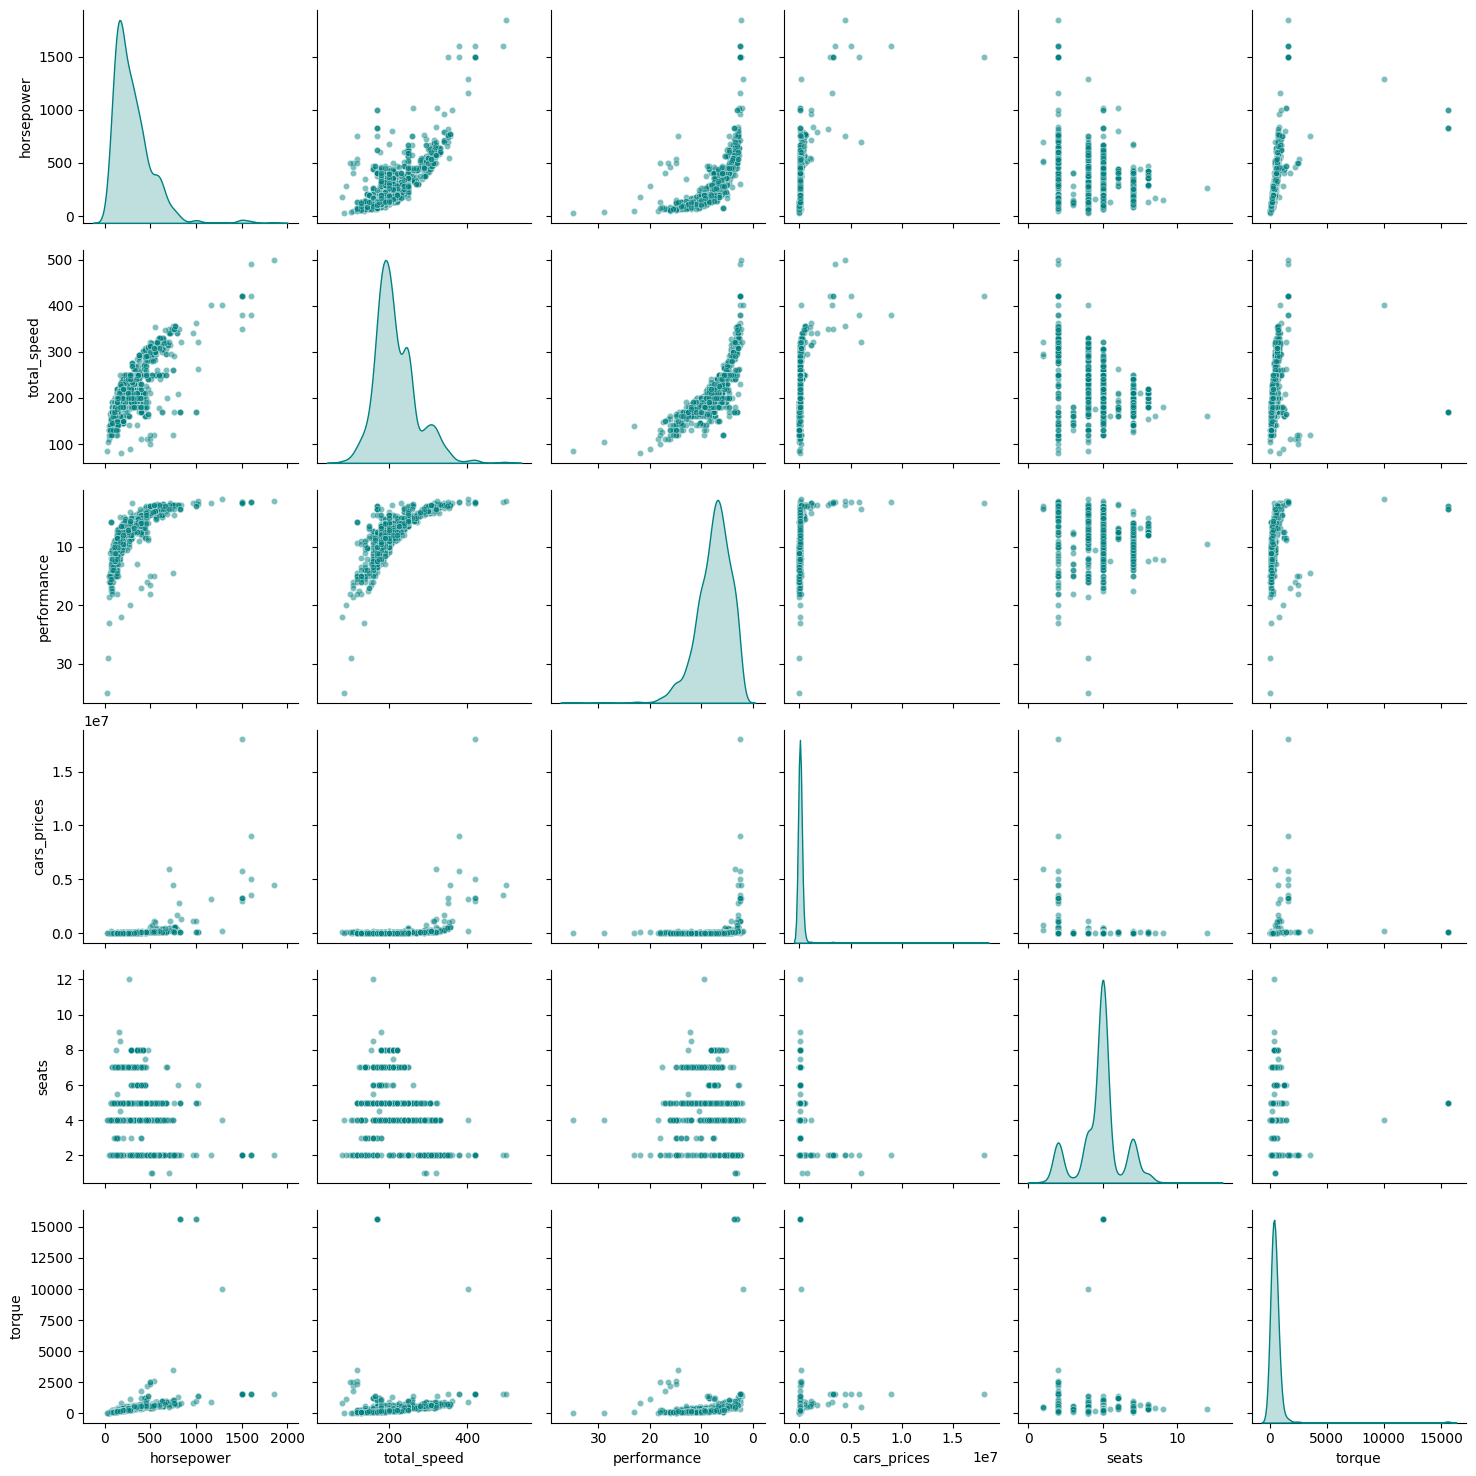

In [40]:
numeric_cols = both_cars_df.select_dtypes(include="number")

plot = sns.pairplot(
    numeric_cols,
    diag_kind="kde",
    plot_kws={'alpha':0.5, 's':20, 'color': 'teal'},
    diag_kws={'fill':True, 'color':'teal'},
    height=2.5
)

# Invert axes for "performance"
for ax in plot.axes.flatten():
    if ax is not None:
        xlabel = ax.get_xlabel()
        ylabel = ax.get_ylabel()
        if xlabel == "performance":
            ax.invert_xaxis()
        if ylabel == "performance":
            ax.invert_yaxis()

plt.show()

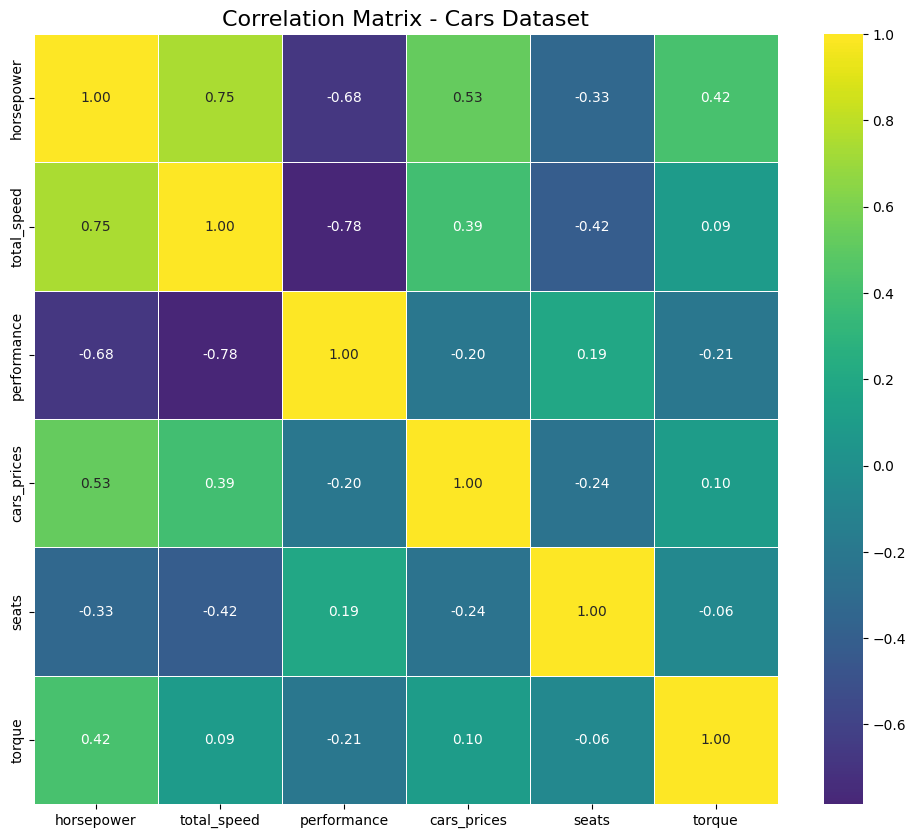

In [41]:
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='viridis', 
            center=0, 
            linewidths=0.5, 
            linecolor='white',
            fmt=".2f")

plt.title('Correlation Matrix - Cars Dataset', fontsize=16)
plt.show()

In [42]:
both_cars_w_outliers_df = both_cars_df.copy()

mask = BaseDataHandler.static_detect_outliers_all(both_cars_df, method="percentile", lower_percentile=0.01, upper_percentile=0.90)
both_cars_df = both_cars_df[~mask.any(axis=1)]

#mask = BaseDataHandler.static_detect_outliers_all(electric_cars_df, method="percentile", lower_percentile=0.01, upper_percentile=0.90)
#electric_cars_df = electric_cars_df[~mask.any(axis=1)]

mask = BaseDataHandler.static_detect_outliers_all(gas_cars_df, method="percentile", lower_percentile=0.01, upper_percentile=0.90)
gas_cars_df = gas_cars_df[~mask.any(axis=1)]

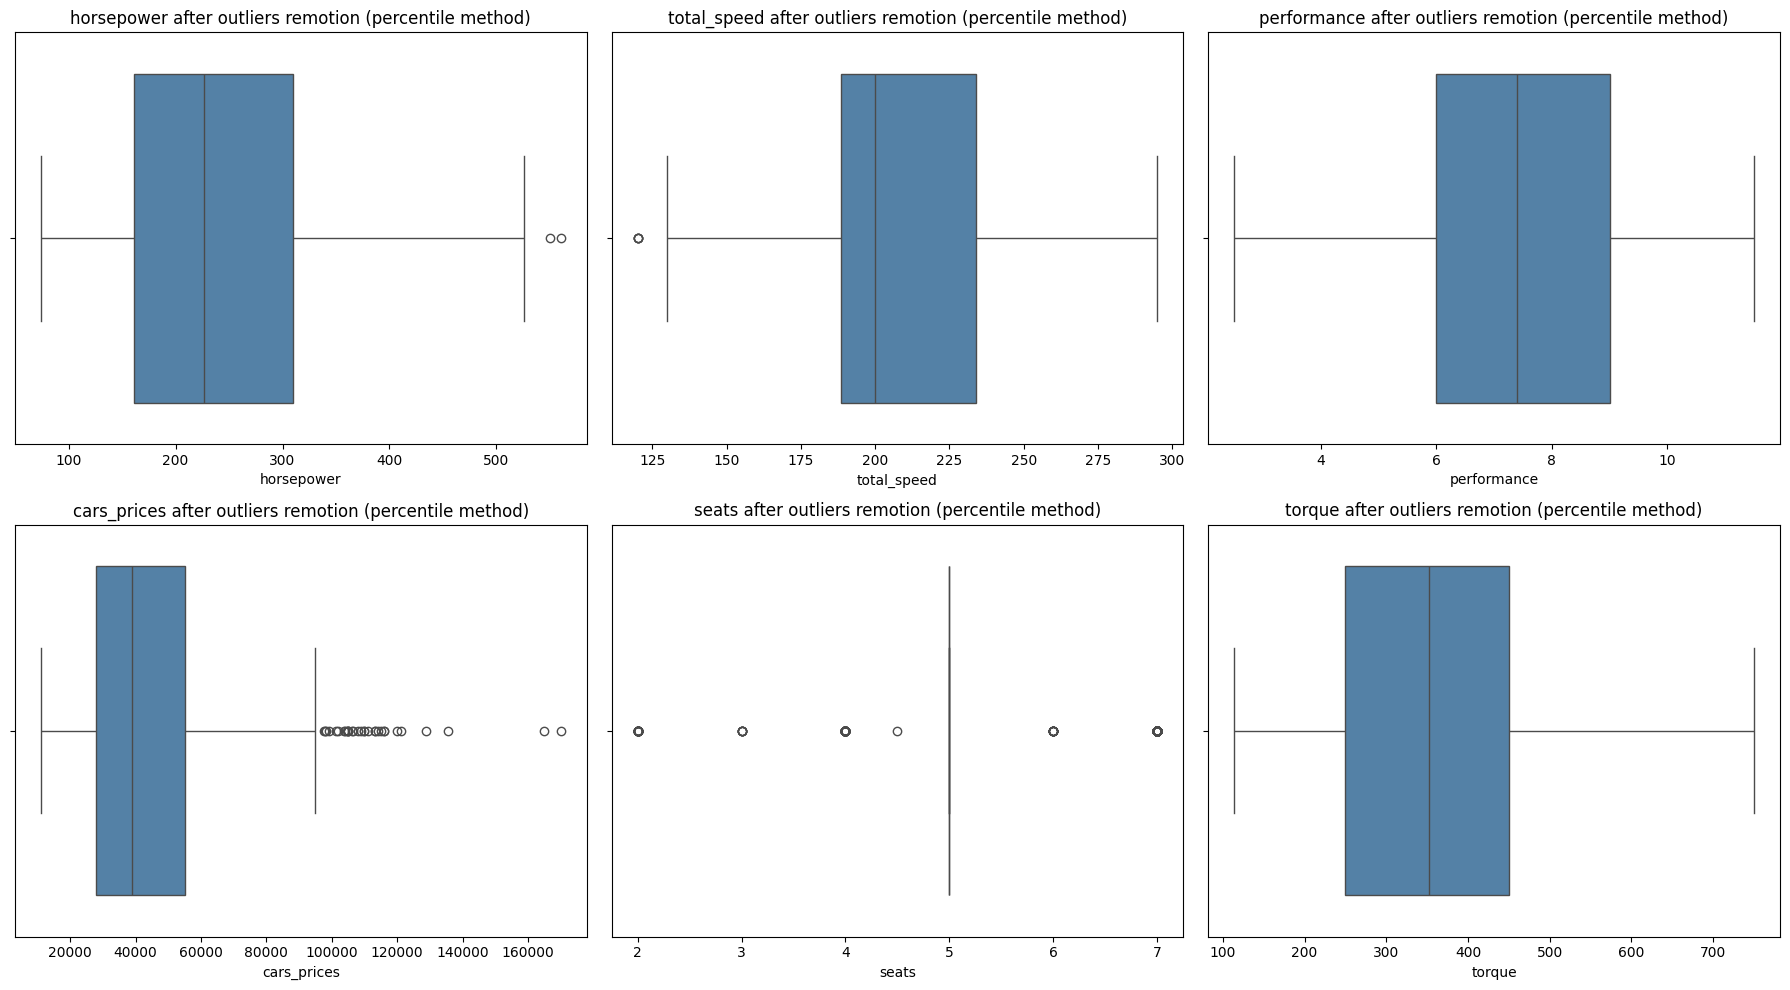

In [43]:
# Get numeric columns
numeric_cols = both_cars_df.select_dtypes(include="number").columns
n_cols = len(numeric_cols)

# Grid layout: 3 plots per row
n_rows = (n_cols + 2) // 3
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5*n_rows))  # larger grid
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    # Full boxplot
    sns.boxplot(data=both_cars_df, x=col, color="steelblue", ax=axes[i])

    axes[i].set_title(f"{col} after outliers remotion (percentile method)", fontsize=12)

# Remove unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

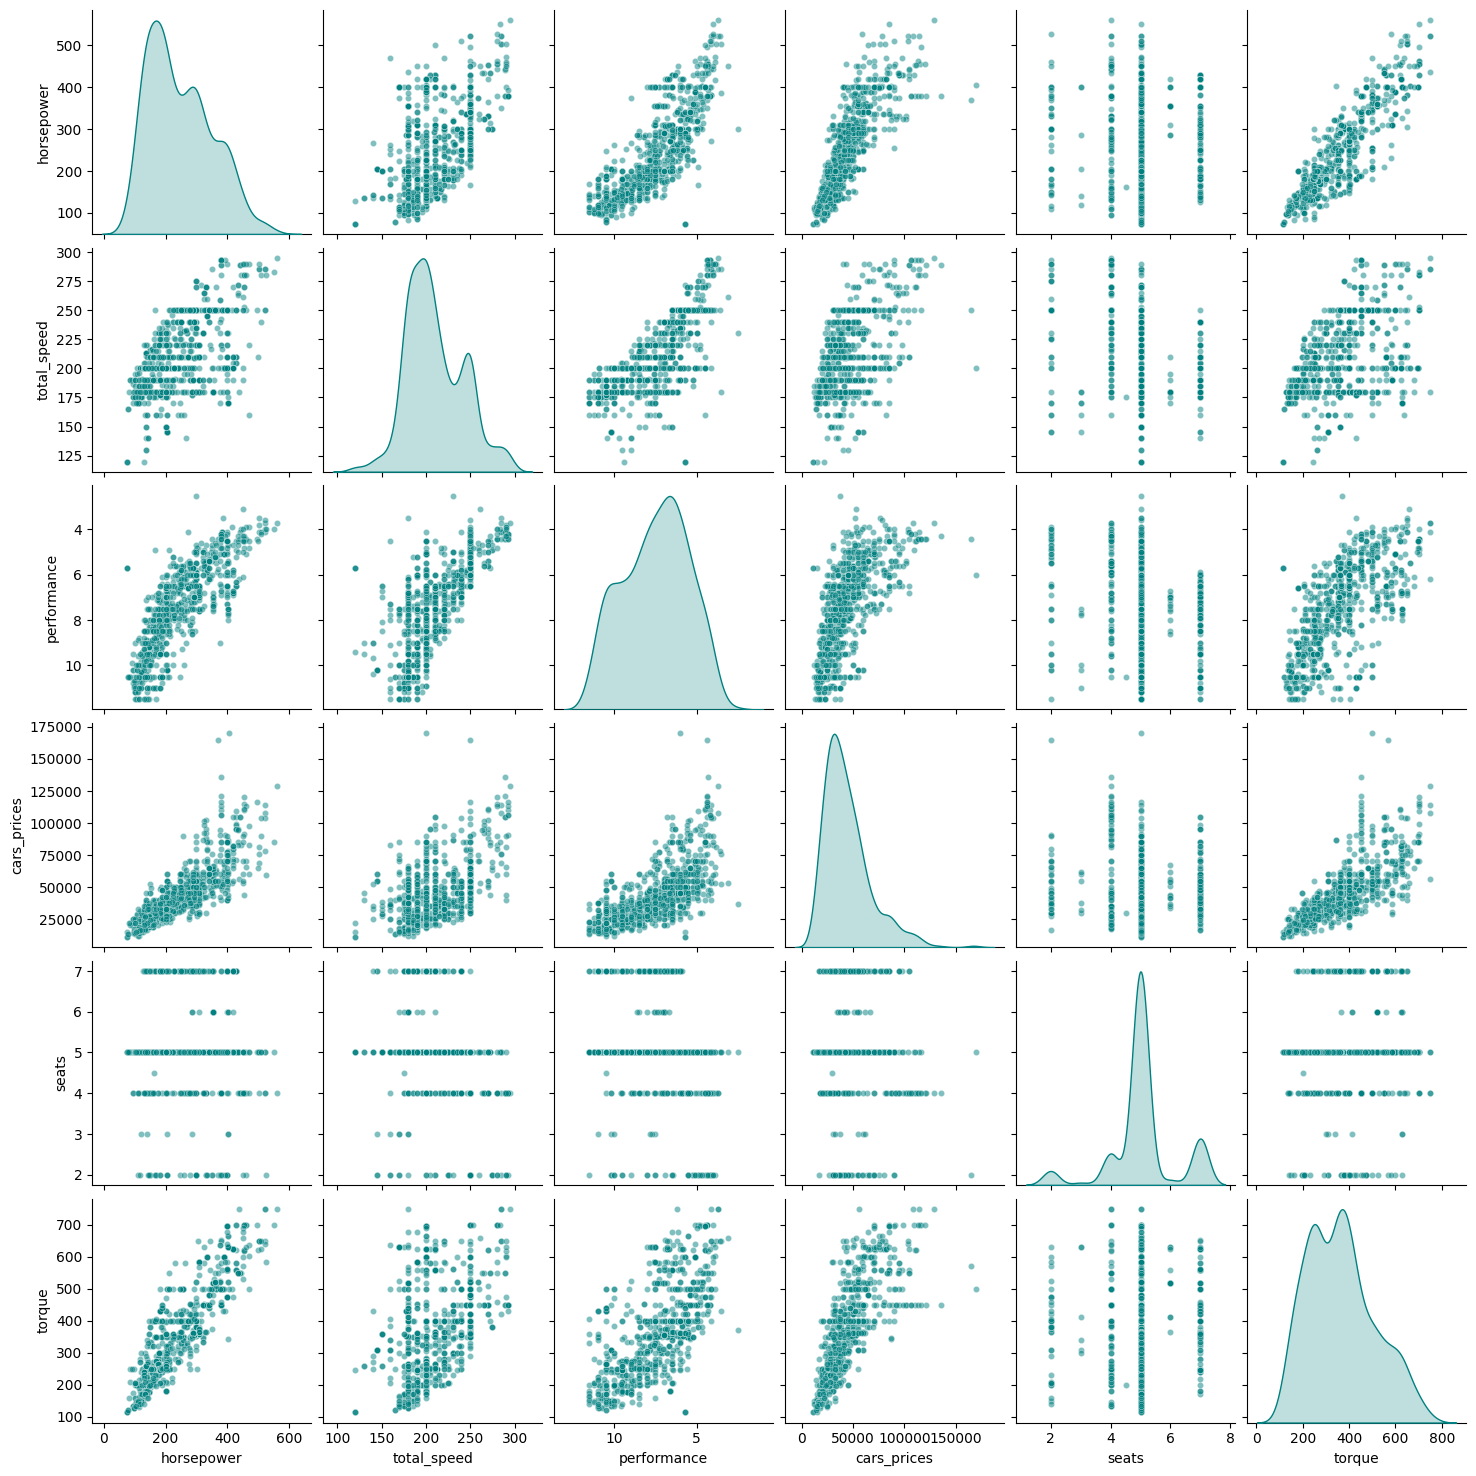

In [44]:
numeric_cols = both_cars_df.select_dtypes(include="number")

plot = sns.pairplot(
    numeric_cols,
    diag_kind="kde",
    plot_kws={'alpha':0.5, 's':20, 'color': 'teal'},
    diag_kws={'fill':True, 'color':'teal'},
    height=2.5
)

# Invert axes for "performance"
for ax in plot.axes.flatten():
    if ax is not None:
        xlabel = ax.get_xlabel()
        ylabel = ax.get_ylabel()
        if xlabel == "performance":
            ax.invert_xaxis()
        if ylabel == "performance":
            ax.invert_yaxis()

plt.show()

(True, None)

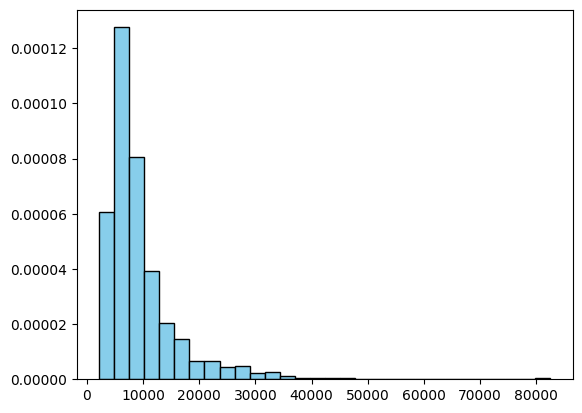

In [45]:
_, _ = BaseDataHandler.static_try_add_col(both_cars_df, target_col="price_per_seats", criteria=lambda df: df["cars_prices"] / df["seats"])


""" group_df = both_cars_df.groupby("seats").count()

# If you want to sort by the counts of one column (say 'horsepower'):
group_df = group_df.sort_values(by="horsepower", ascending=False)

# Or if you just want to sort by the index (the seat numbers themselves):
group_df = group_df.sort_index(ascending=False)

print(group_df.head(20)) """
_ = plt.hist(both_cars_df["price_per_seats"], bins=30, color='skyblue', edgecolor='black', density=True)


from utils.base_data_handler import BaseDataHandler as BDH

gas_handler = BDH(df =gas_cars_df)
gas_handler.try_save_to_csv()

In [46]:
both_cars_df = both_cars_df.drop(["price_per_seats", "seats"], axis=1)
#both_cars_df.info()

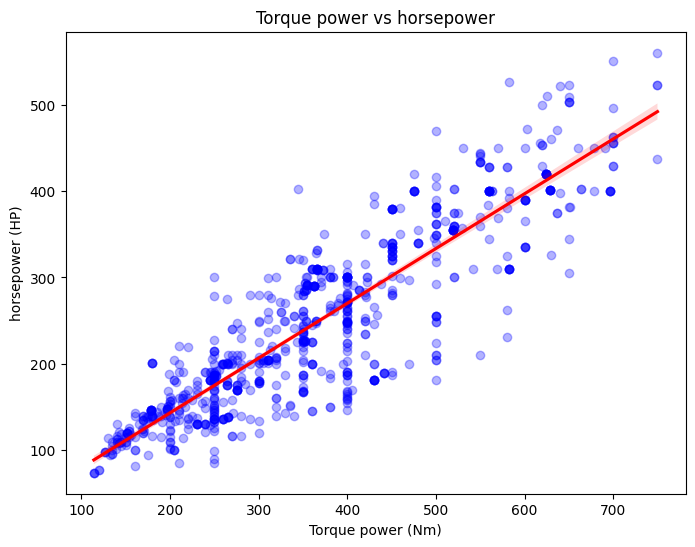

In [47]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.regplot(
    x="torque",
    y="horsepower",
    data=both_cars_df,
    scatter_kws={'alpha': 0.3, 'color': 'blue'},
    line_kws={'color': 'red'},
    ax=ax
)

ax.set_title('Torque power vs horsepower')
ax.set_xlabel("Torque power (Nm)")
ax.set_ylabel("horsepower (HP)")

plt.show()

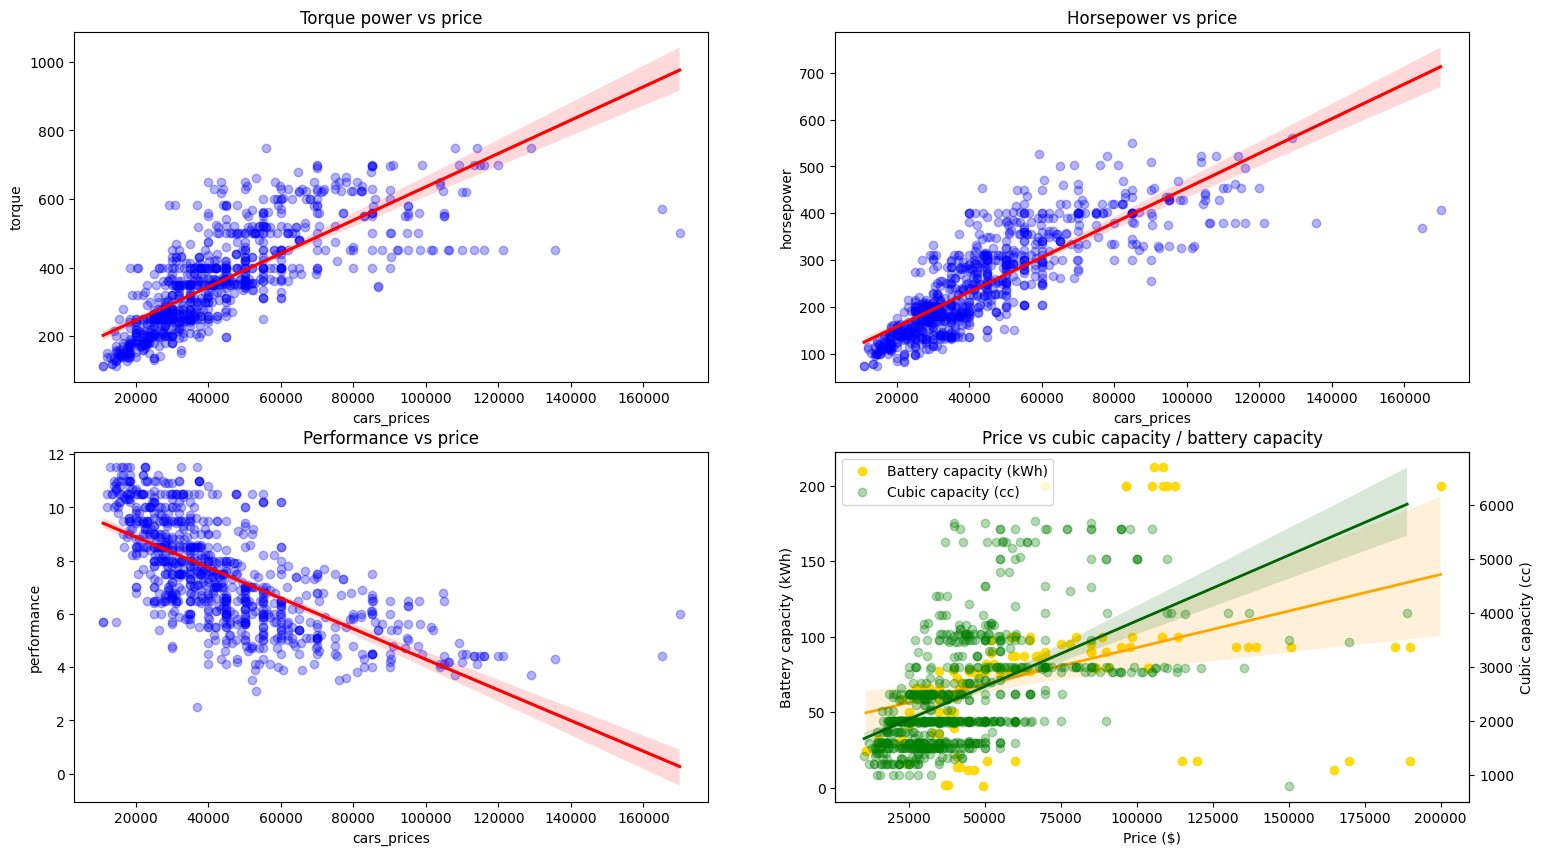

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(18, 5*n_rows))
axes = axes.flatten()

sns.regplot(
    y="torque",
    x="cars_prices",
    data=both_cars_df,
    scatter_kws={'alpha': 0.3, 'color': 'blue'},
    line_kws={'color': 'red'},
    ax=axes[0]
)
axes[0].set_title('Torque power vs price')

sns.regplot(
    y="horsepower",
    x="cars_prices",
    data=both_cars_df,
    scatter_kws={'alpha': 0.3, 'color': 'blue'},
    line_kws={'color': 'red'},
    ax=axes[1]
)
axes[1].set_title('Horsepower vs price')

sns.regplot(
    y="performance",
    x="cars_prices",
    data=both_cars_df,
    scatter_kws={'alpha': 0.3, 'color': 'blue'},
    line_kws={'color': 'red'},
    ax=axes[2]
)
axes[2].set_title('Performance vs price')


# --- Main axis: Price vs Battery capacity ---
ax1 = axes[3]

sns.regplot(
    x="cars_prices",
    y="battery_capacity",
    data=electric_cars_df,
    scatter_kws={'alpha': 0.9, 'color': 'gold'},
    line_kws={'color': 'orange', 'linewidth': 2},
    label='Battery capacity (kWh)',  # <-- Add this
    ax=ax1
)

ax1.set_xlabel("Price ($)")
ax1.set_ylabel("Battery capacity (kWh)")
ax1.tick_params(axis='y')

# --- Second axis: Price vs Cubic capacity ---
ax2 = ax1.twinx()

sns.regplot(
    x="cars_prices",
    y="engine_cc",
    data=gas_cars_df,
    scatter_kws={'alpha': 0.3, 'color': 'green'},
    line_kws={'color': 'darkgreen', 'linewidth': 2},
    label='Cubic capacity (cc)',  # <-- Add this
    ax=ax2
)

ax2.set_ylabel("Cubic capacity (cc)")
ax2.tick_params(axis='y')

# --- Title and Combined Legend ---
ax1.set_title("Price vs cubic capacity / battery capacity")

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper left')


## Feature Engineering

In [49]:
BaseDataHandler._try_add_col(both_cars_df, target_col="price_performance_ratio", criteria=lambda df: df["cars_prices"] / df["performance"])
BaseDataHandler._try_add_col(both_cars_df, target_col="horsepower_per_thousand_dollars", criteria=lambda df: df["horsepower"] / df["cars_prices"] * 1000)

AttributeError: type object 'BaseDataHandler' has no attribute '_try_add_col'

In [ ]:
horsepower_per_thousand_dollars_per_company = pd.pivot_table(                # torna a tabella
            
            both_cars_df,
            index="company_names",
            values="horsepower_per_thousand_dollars",
            aggfunc="mean"
        )
# Conteggio elementi per marca
count_per_company = both_cars_df.groupby("company_names").size().to_frame("cars amount")

# Unione (merge sugli indici)
horsepower_per_thousand_dollars_per_company = horsepower_per_thousand_dollars_per_company.join(count_per_company)

horsepower_per_thousand_dollars_per_company = horsepower_per_thousand_dollars_per_company.sort_values(
    by="horsepower_per_thousand_dollars",
    ascending=False
).round(2)

horsepower_per_thousand_dollars_per_company

,horsepower_per_thousand_dollars,cars amount
company_names,,
Mahindra,8.10,3
Tesla,7.59,4
Maruti Suzuki,7.15,1
Honda,7.05,6
Chevrolet,6.94,46
Tata Motors,6.82,9
Ford,6.77,41
Hyundai,6.66,21
Nissan,6.41,122


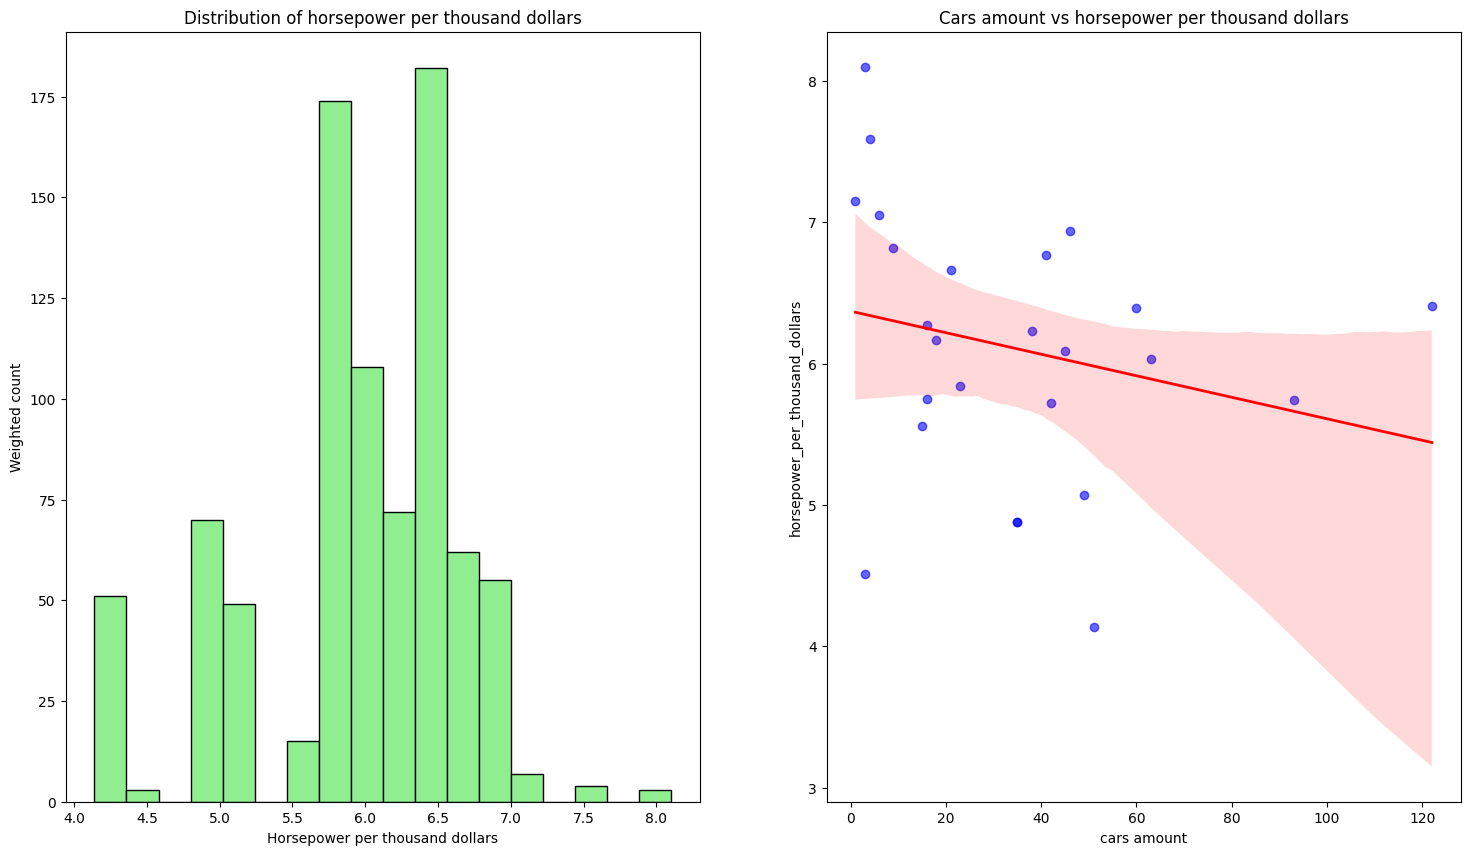

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5*n_rows))
axes = axes.flatten()

# Histogram on axes[0]
axes[0].hist(
    horsepower_per_thousand_dollars_per_company["horsepower_per_thousand_dollars"],
    bins=18,
    color='lightgreen',
    edgecolor='black',
    weights=horsepower_per_thousand_dollars_per_company["cars amount"]
)

axes[0].set_title("Distribution of horsepower per thousand dollars")
axes[0].set_xlabel("Horsepower per thousand dollars")
axes[0].set_ylabel("Weighted count")

# Regression plot on axes[1]
sns.regplot(
    data=horsepower_per_thousand_dollars_per_company,
    x="cars amount",
    y="horsepower_per_thousand_dollars",
    scatter_kws={'alpha': 0.6, 'color': 'blue'},
    line_kws={'color': 'red', 'linewidth': 2},
    ax=axes[1]
)

_=axes[1].set_title("Cars amount vs horsepower per thousand dollars")

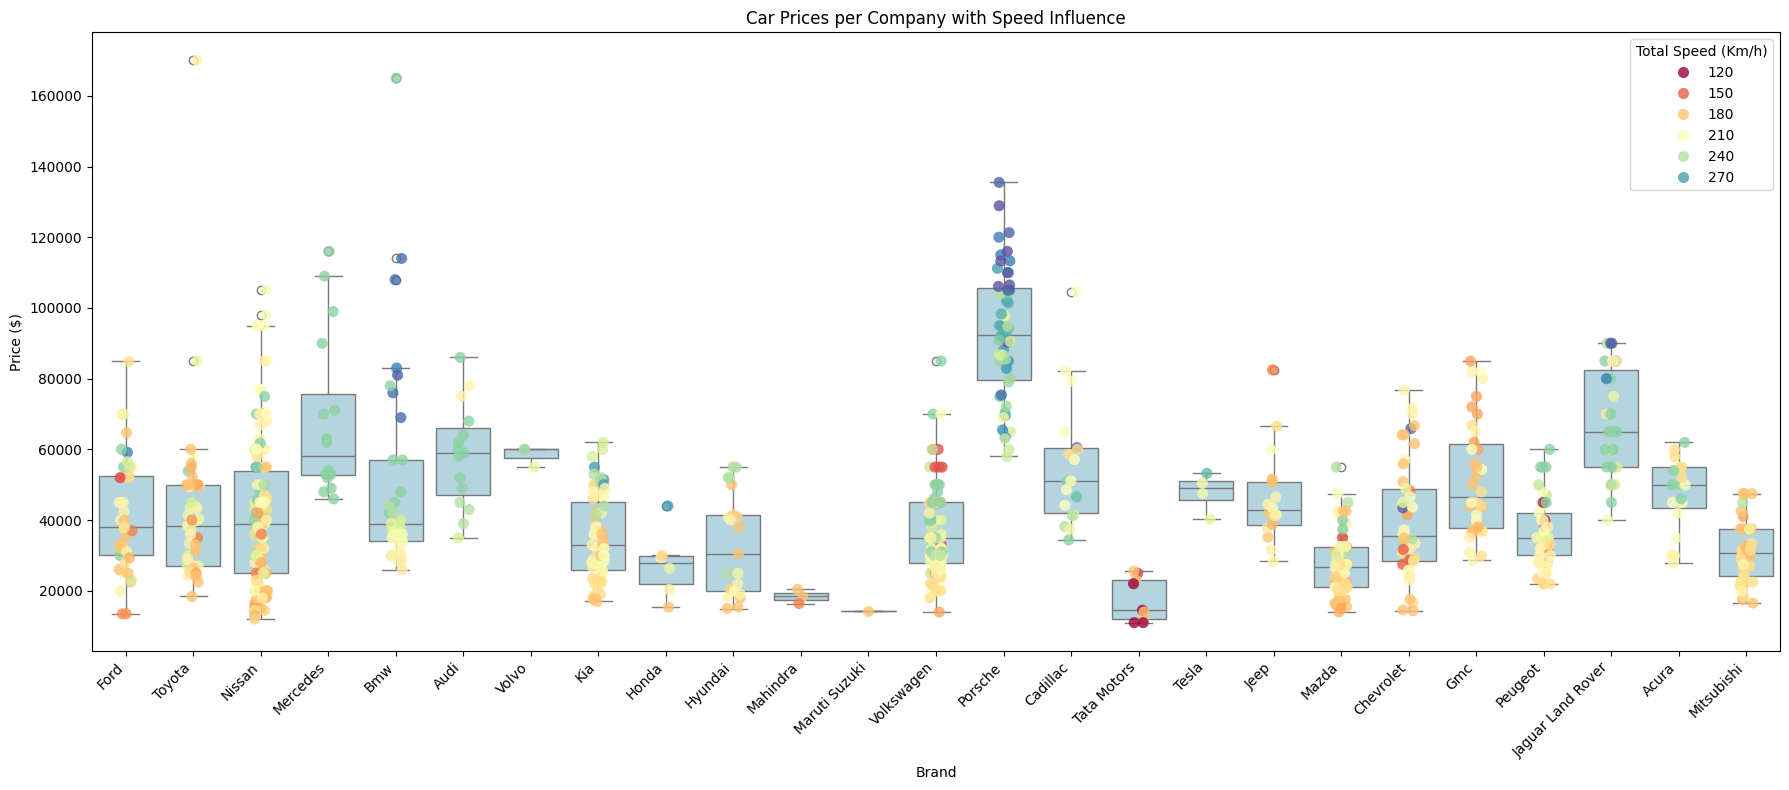

In [ ]:
plt.figure(figsize=(18,8))

sns.boxplot(
    data=both_cars_df,
    x="company_names",
    y="cars_prices",
    color="lightblue"
)

sns.stripplot(
    data=both_cars_df,
    x="company_names",
    y="cars_prices",
    hue="total_speed",
    palette="Spectral",
    size=8,
    dodge=False,
    alpha=0.8
)

plt.xticks(rotation=45, ha="right")
plt.title("Car Prices per Company with Speed Influence")
plt.ylabel("Price ($)")
plt.xlabel("Brand")
plt.legend(title="Total Speed (Km/h)")
plt.tight_layout()
plt.show()

In [ ]:
def safe_corr(g):
    if g["total_speed"].nunique() > 1 and g["cars_prices"].nunique() > 1:
        return g["total_speed"].corr(g["cars_prices"])
    else:
        return None

correlation_per_company = (
    both_cars_df.groupby("company_names")[["total_speed", "cars_prices"]]
    .apply(safe_corr)
    .to_frame("correlation")
    .dropna()
    .round(2)
)


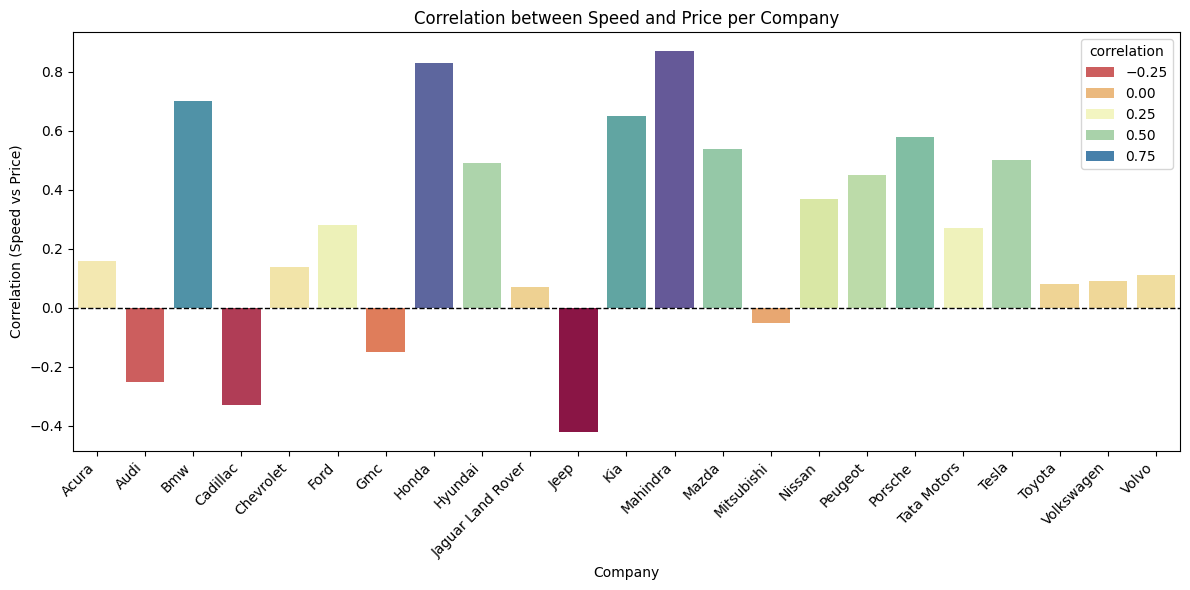

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=correlation_per_company.reset_index(),
    x="company_names",
    y="correlation",
    hue="correlation",
    palette="Spectral"
)

plt.axhline(0, color="black", linewidth=1, linestyle="--")  # baseline
plt.xticks(rotation=45, ha="right")
plt.ylabel("Correlation (Speed vs Price)")
plt.xlabel("Company")
plt.title("Correlation between Speed and Price per Company")
plt.tight_layout()
plt.show()


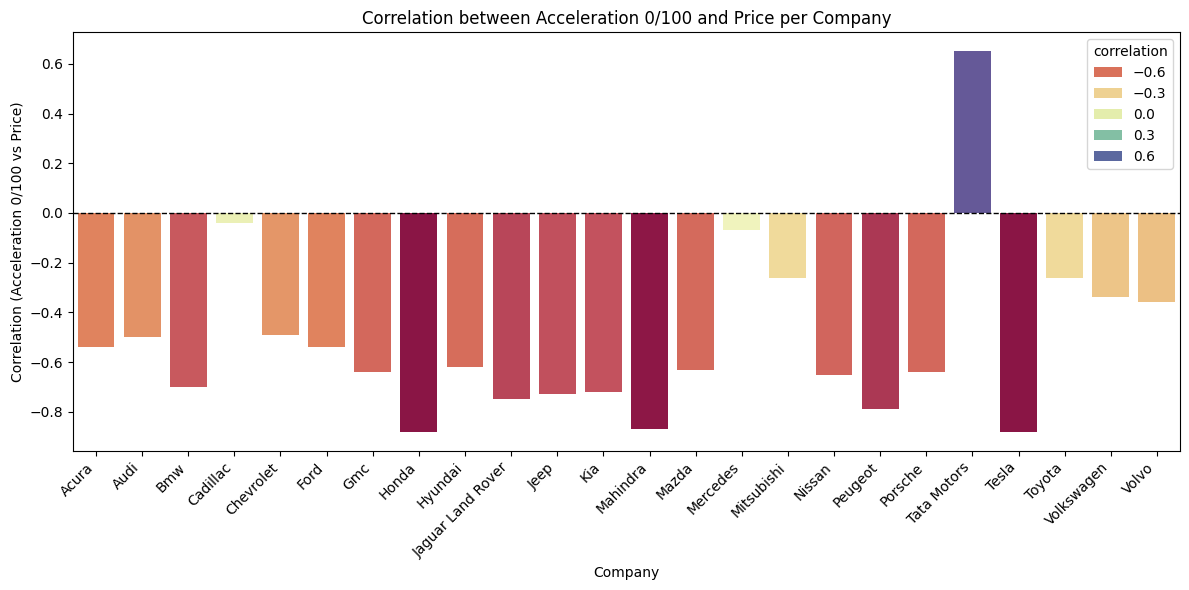

In [ ]:
def safe_corr(g):
    if g["performance"].nunique() > 1 and g["cars_prices"].nunique() > 1:
        return g["performance"].corr(g["cars_prices"])
    else:
        return None

correlation_per_company = (
    both_cars_df.groupby("company_names")[["performance", "cars_prices"]]
    .apply(safe_corr)
    .to_frame("correlation")
    .dropna()
    .round(2)
)


plt.figure(figsize=(12,6))
sns.barplot(
    data=correlation_per_company.reset_index(),
    x="company_names",
    y="correlation",
    hue="correlation",
    palette="Spectral"
)

plt.axhline(0, color="black", linewidth=1, linestyle="--")  # baseline
plt.xticks(rotation=45, ha="right")
plt.ylabel("Correlation (Acceleration 0/100 vs Price)")
plt.xlabel("Company")
plt.title("Correlation between Acceleration 0/100 and Price per Company")
plt.tight_layout()
plt.show()

In [ ]:
BaseDataHandler.static_try_add_col(both_cars_df, target_col="price_to_performance", criteria=lambda df: df["cars_prices"] / df["performance"])

(True, None)

In [ ]:
fuel_stats = (
    both_cars_df.groupby("fuel_types")
    .agg(
        avg_speed=("total_speed", "mean"),
        avg_torque=("torque", "mean"),
        avg_price_to_perf=("price_to_performance", "mean"),
        car_count=("fuel_types", "count")
    )
    .round(2)
    .sort_values("avg_speed", ascending=False)
)

print(fuel_stats)

                avg_speed  avg_torque  avg_price_to_perf  car_count
fuel_types                                                         
Petrol             215.47      352.58            7013.47        624
Hybrid, Petrol     205.48      336.90            5817.22         21
Hybrid             204.46      383.62            7375.22         71
Diesel, Petrol     199.00      415.67            6168.40         15
Diesel             191.48      406.88            4116.36         52
Ev, Petrol         185.00      400.00            2733.33          1
Electric           182.57      418.04            9555.31         68
Hydrogen           180.00      356.67            5355.82          3


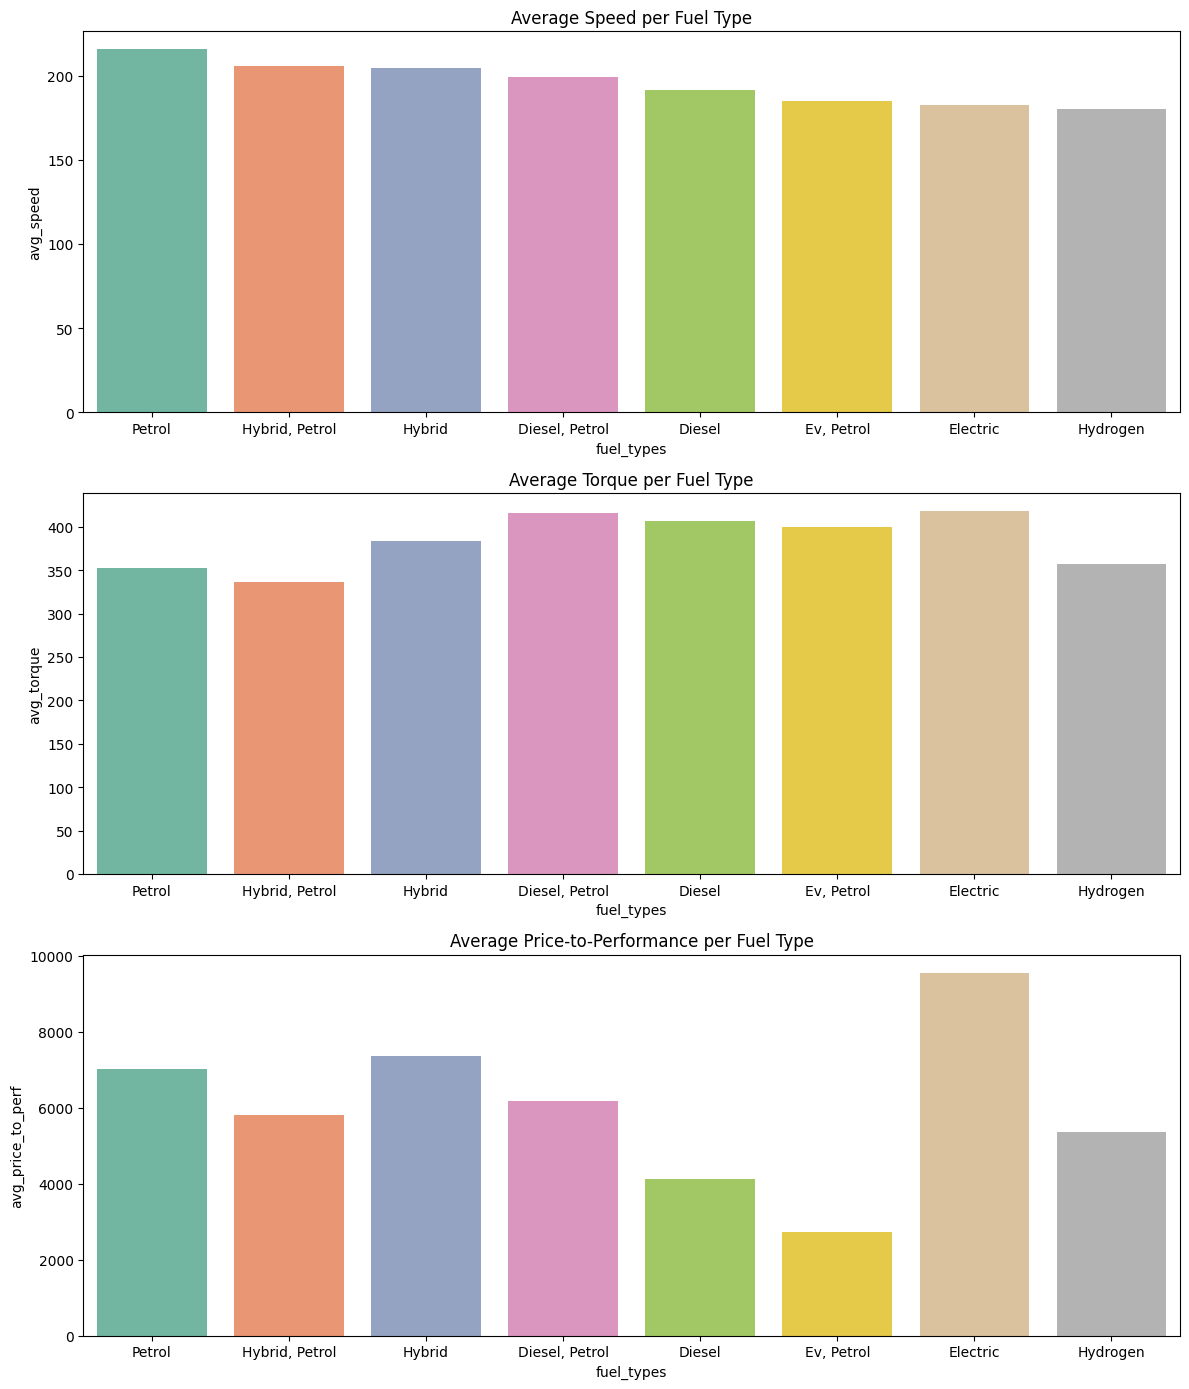

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(12, 14))

sns.barplot(data=fuel_stats.reset_index(), 
            x="fuel_types", 
            y="avg_speed",
            hue="fuel_types", 
            palette="Set2", 
            ax=axes[0])

axes[0].set_title("Average Speed per Fuel Type")

sns.barplot(data=fuel_stats.reset_index(), 
            x="fuel_types", 
            y="avg_torque",
            hue="fuel_types", 
            palette="Set2", 
            ax=axes[1])
axes[1].set_title("Average Torque per Fuel Type")

sns.barplot(data=fuel_stats.reset_index(), 
            x="fuel_types", 
            y="avg_price_to_perf", 
            palette="Set2",
            hue="fuel_types", 
            ax=axes[2])
axes[2].set_title("Average Price-to-Performance per Fuel Type")

plt.tight_layout()
plt.show()

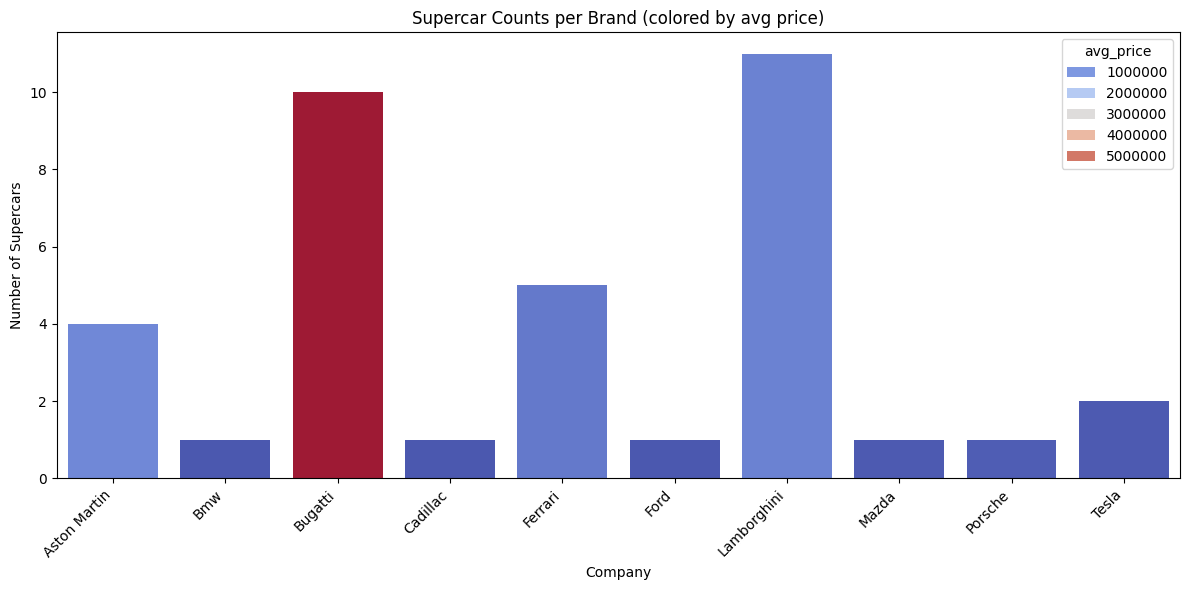

In [ ]:
# Define thresholds dynamically
speed_threshold = both_cars_w_outliers_df["total_speed"].quantile(0.95)   # top 5% speeds
hp_threshold = both_cars_w_outliers_df["horsepower"].quantile(0.95)       # top 5% horsepower

both_cars_w_outliers_df["is_supercar"] = np.where(
    (both_cars_w_outliers_df["total_speed"] >= speed_threshold) &
    (both_cars_w_outliers_df["horsepower"] >= hp_threshold),
    1, 0
)

supercar_stats = (
    both_cars_w_outliers_df.groupby("company_names")
    .agg(
        supercar_count=("is_supercar", "sum"),
        avg_price=("cars_prices", "mean")
    )
    .reset_index()
)

# Keep only brands with at least one supercar
supercar_stats = supercar_stats[supercar_stats["supercar_count"] > 0]

plt.figure(figsize=(12,6))
sns.barplot(
    data=supercar_stats,
    x="company_names",
    y="supercar_count",
    hue="avg_price",
    palette="coolwarm"
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of Supercars")
plt.xlabel("Company")
plt.title("Supercar Counts per Brand (colored by avg price)")
plt.tight_layout()
plt.show()